<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/mlflow/LlamaIndex/LLamaIndex_with_MLflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integration MLFLOW & LLamaIndex


### MLFLOW

https://mlflow.org/docs/latest/index.html

MLflow is an open-source platform, purpose-built to assist machine learning practitioners and teams in handling the complexities of the machine learning process. MLflow focuses on the full lifecycle for machine learning projects, ensuring that each phase is manageable, traceable, and reproducible.

### LlamaIndex
LlamaIndex is a framework for building context-augmented generative AI applications with LLMs including agents and workflows.

https://docs.llamaindex.ai/en/stable/


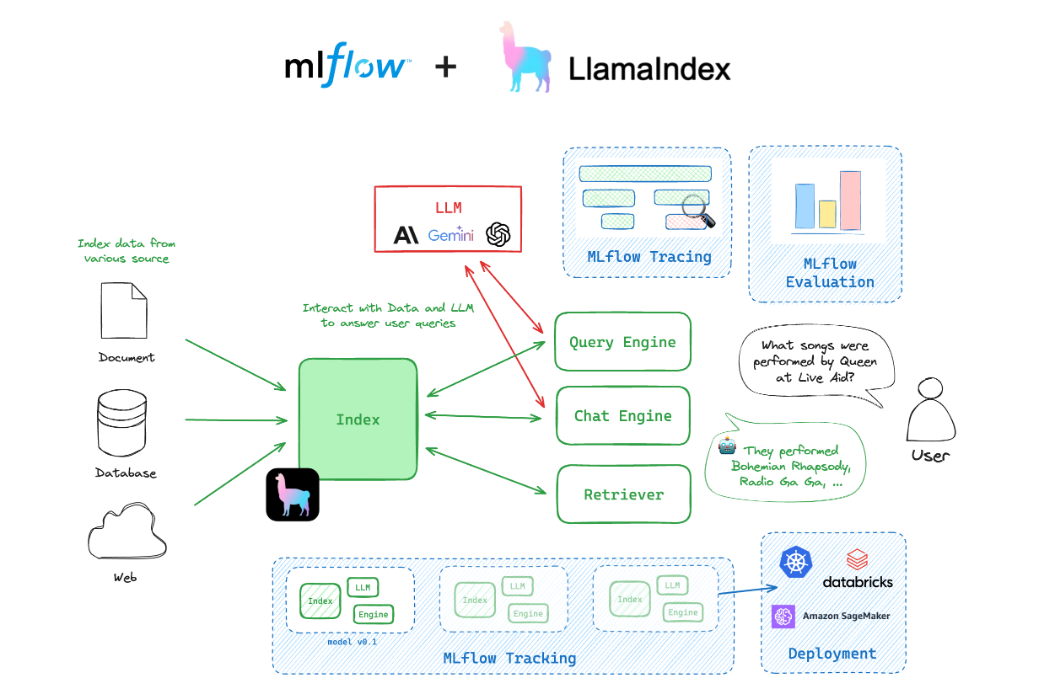

In [1]:
%pip install "mlflow>=2.15" "llama-index>=0.10.44"  pyngrok  -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8

In [2]:
from pyngrok import ngrok

get_ipython().system_raw("mlflow ui --port 5000 &")


# Terminate open tunnels if exist
ngrok.kill()

In [3]:

from google.colab import userdata
NGROK_AUTH_TOKEN  = userdata.get('NGROK')

ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://eeb7-104-199-160-235.ngrok-free.app


In [13]:
from llama_index.core import Document, VectorStoreIndex
from llama_index.core.llms import ChatMessage
import os
import mlflow
from google.colab import userdata
import pprint

os.environ["OPENAI_API_KEY"] = userdata.get('KEY_OPENAI')

In [6]:
assert "OPENAI_API_KEY" in os.environ, "Please set the OPENAI_API_KEY environment variable."

In [8]:
pdf_path = "/content/drive/MyDrive/data/pdfs"

In [66]:
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding

# initialize the LLM
llm = OpenAI(model="gpt-4o", api_key=userdata.get('KEY_OPENAI'))

# initialize the embedding
embed_model = OpenAIEmbedding(model="text-embedding-ada-002", api_key=userdata.get('KEY_OPENAI'))

from llama_index.core import Settings

# global settings
Settings.llm = llm
Settings.embed_model = embed_model

In [67]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

# load documents
data = SimpleDirectoryReader(input_dir=pdf_path,required_exts=[".pdf"]).load_data()

# indexing documents using vector store
index = VectorStoreIndex.from_documents(data)

In [68]:
data[0]

Document(id_='61487746-96e0-46a9-90a9-d2257e70264f', embedding=None, metadata={'page_label': '1', 'file_name': 'Parser Source 2.pdf', 'file_path': '/content/drive/MyDrive/data/pdfs/Parser Source 2.pdf', 'file_type': 'application/pdf', 'file_size': 1930169, 'creation_date': '2024-11-07', 'last_modified_date': '2024-11-07'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='Company Profiles on following pages  \n ', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')

In [70]:
index.summary

'None'

In [71]:
print("\n------------- Example Query Engine -------------")
query_response = index.as_query_engine(llm=llm, embed_model=embed_model).query("give me Appointments Board Positions list with names and other details of Aardvark Constructions Limited")
print(query_response)




------------- Example Query Engine -------------
The appointments to board positions at Aardvark Constructions Limited include the following:

1. Nicole Adams was appointed as Director on 10/09/2020 and later as Alternate Director on 15/03/2023. She resigned from her positions, including Director and Alternate Director, on 31/08/2023 and 14/11/2023, respectively.

2. Tim Haines was appointed as Director on 13/11/2022.

3. ABNB AltBauNeu Baugesellschaft mbH was appointed as Company Secretary on 19/12/2022.

4. Trustme was appointed as Managing Member on 30/01/2023.

5. Mohammed Malek was appointed as Chair on 31/01/2023 and resigned from his positions, including Chair, Chief Executive Officer, and Director, on 10/04/2023.

6. Gordon Tatun was appointed as Director on 12/10/2023.

7. Brian Jenkins was appointed as Director on 29/11/2023.


In [72]:
print("\n------------- Example Chat Engine  -------------")
chat_response = index.as_chat_engine(llm=llm, embed_model=embed_model).chat(
    "give me Appointments Board Positions list with names and other details of Aardvark Constructions Limited",
    chat_history=[ChatMessage(role="system", content="You are an expert on RAG!")],
)
print(chat_response)




------------- Example Chat Engine  -------------
Here is the list of board positions and appointments for Aardvark Constructions Limited:

1. **Nicole Adams**
   - Appointed as Director on 10/09/2020
   - Appointed as Alternate Director on 15/03/2023
   - Resigned from all positions including Director, Alternate Director, Chief Executive, Company Secretary, Deputy Chief Executive, Designated Member, Directeur Conformité, and Joint Secretary on 14/11/2023.

2. **Tim Haines**
   - Appointed as Director on 13/11/2022.

3. **ABNB AltBauNeu Baugesellschaft mbH**
   - Appointed as Company Secretary on 19/12/2022.

4. **Trustme**
   - Appointed as Managing Member on 30/01/2023.

5. **Mohammed Malek**
   - Appointed as Chair on 31/01/2023
   - Resigned as Chair, Chief Executive Officer, and Director on 10/04/2023.

6. **Gordon Tatun**
   - Appointed as Director on 12/10/2023.

7. **Brian Jenkins**
   - Appointed as Director on 29/11/2023.


In [73]:
print("\n------------- Example Retriever   -------------")
retriever_response = index.as_retriever().retrieve("give me Appointments Board Positions list with names and other details of Aardvark Constructions Limited")
pprint.pprint(retriever_response)


------------- Example Retriever   -------------
[NodeWithScore(node=TextNode(id_='671117ce-8ede-4d31-a13c-3a2c44fb0960', embedding=None, metadata={'page_label': '8', 'file_name': 'Parser Source 2.pdf', 'file_path': '/content/drive/MyDrive/data/pdfs/Parser Source 2.pdf', 'file_type': 'application/pdf', 'file_size': 1930169, 'creation_date': '2024-11-07', 'last_modified_date': '2024-11-07'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='783c8a18-6b84-446e-a67c-8d8d7ba688a3', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '8', 'file_name': 'Parser Source 2.pdf', 'file_path': '/content/drive/MyDrive/data/pdfs/Parser Source 2.pdf', 'file_type': 'application/pdf', 'file_size': 1930169, 'creation

In [58]:
retriever_response

[NodeWithScore(node=TextNode(id_='13d5d44c-3e06-4087-a535-1cdd87e41900', embedding=None, metadata={'page_label': '8', 'file_name': 'Parser Source 2.pdf', 'file_path': '/content/drive/MyDrive/data/pdfs/Parser Source 2.pdf', 'file_type': 'application/pdf', 'file_size': 1930169, 'creation_date': '2024-11-07', 'last_modified_date': '2024-11-07'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='411ad83b-d00b-4357-8a78-70a6d8582aba', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '8', 'file_name': 'Parser Source 2.pdf', 'file_path': '/content/drive/MyDrive/data/pdfs/Parser Source 2.pdf', 'file_type': 'application/pdf', 'file_size': 1930169, 'creation_date': '2024-11-07', 'last_modified_date': '2024

In [16]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")
#
mlflow.set_experiment("save LlamaIndex")

2024/11/07 13:50:38 INFO mlflow.tracking.fluent: Experiment with name 'save LlamaIndex' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/628421178147187747', creation_time=1730987438865, experiment_id='628421178147187747', last_update_time=1730987438865, lifecycle_stage='active', name='save LlamaIndex', tags={}>

In [74]:
mlflow.llama_index.autolog()  # This is for enabling tracing

with mlflow.start_run(run_name="gpt-4o") as run:
    mlflow.llama_index.log_model(
        index,
        artifact_path="llama_index",
        engine_type="query",  # Defines the pyfunc and spark_udf inference type
        input_example="hi",  # Infers signature
        registered_model_name="llama_index_vector_store",  # Stores an instance in the model registry
    )

    run_id = run.info.run_id
    model_uri = f"runs:/{run_id}/llama_index"
    print(f"Unique identifier for the model location for loading: {model_uri}")

2024/11/07 16:48:10 INFO mlflow.llama_index.serialize_objects: API key(s) will be removed from the global Settings object during serialization to protect against key leakage. At inference time, the key(s) must be passed as environment variables.
Registered model 'llama_index_vector_store' already exists. Creating a new version of this model...
2024/11/07 16:48:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: llama_index_vector_store, version 3
Created version '3' of model 'llama_index_vector_store'.


2024/11/07 16:48:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run gpt-4o at: http://localhost:5000/#/experiments/628421178147187747/runs/c195f8d4721a4b0cb49a73d9edd39815.
2024/11/07 16:48:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/628421178147187747.


Unique identifier for the model location for loading: runs:/c195f8d4721a4b0cb49a73d9edd39815/llama_index


In [75]:
prompt = """
Provide Main Details of the company Aardvark Constructions Limited. Including following details:
Name:
Country:
Company Number:
Incorporated:
Company Type:
Company Status:
Primary Addresses Registered Office:
Accounting Dates:
Confirmation Statement:
"""

In [76]:
print("\n------------- Inference via Llama Index   -------------")
index_download = mlflow.llama_index.load_model(model_uri)
query_response = index_download.as_query_engine().query(prompt)
print(query_response)


------------- Inference via Llama Index   -------------
Here are the main details for Aardvark Constructions Limited:

- **Name:** Aardvark Constructions Limited
- **Country:** United Kingdom
- **Company Number:** 123456
- **Incorporated:** 20/10/2020
- **Company Type:** Limited by Shares
- **Company Status:** Active
- **Primary Addresses Registered Office:** 6 Chancery Road, London, WC2A 5DP, United Kingdom
- **Accounting Dates:** Last Period End: 16/11/2022, Current Period End: 16/11/2024, Last Extended: 16/11/2022
- **Confirmation Statement:** Last Signed: 17/02/2023, Filed: 17/02/2023, Next Overdue: 03/03/2023


In [88]:
type(index_download)

llama_index.core.indices.vector_store.base.VectorStoreIndex

In [89]:
print("\n------------- Inference via MLflow PyFunc -------------")
index = mlflow.pyfunc.load_model(model_uri)
query_response = index.predict(prompt)
print(query_response)


------------- Inference via MLflow PyFunc -------------


Main Details of Aardvark Constructions Limited are as follows:

- **Name:** Aardvark Constructions Limited
- **Country:** United Kingdom
- **Company Number:** 123456
- **Incorporated:** 20/10/2020
- **Company Type:** Limited by Shares
- **Company Status:** Active
- **Primary Addresses Registered Office:** 6 Chancery Road, London, WC2A 5DP, United Kingdom
- **Accounting Dates:** Last Period End: 16/11/2022, Current Period End: 16/11/2024, Last Extended: 16/11/2022
- **Confirmation Statement:** Last Signed: 17/02/2023, Filed: 17/02/2023, Next Overdue: 03/03/2023


In [90]:
index = mlflow.pyfunc.load_model(model_uri)
type(index)

mlflow.pyfunc.PyFuncModel

In [78]:
prompt2 = """
From Management Details of  Aardvark Constructions Limited extract:
Managed By:
Managed By Email:
"""
prompt3 = """
Past Names of the Company  Aardvark Constructions Limited with their period
"""

prompt4 = """
Appointments Board Positions list with names and other details
"""

In [79]:
# Optional: Spark UDF inference
show_spark_udf_inference = True
if show_spark_udf_inference:
    print("\n------------- Inference via MLflow Spark UDF -------------")
    from pyspark.sql import SparkSession

    spark = SparkSession.builder.getOrCreate()

    udf = mlflow.pyfunc.spark_udf(spark, model_uri, result_type="string")
    df1 = spark.createDataFrame([(prompt,), (prompt2,),(prompt3,), (prompt4,)], ["prompt"])



------------- Inference via MLflow Spark UDF -------------


2024/11/07 16:49:52 WARNING mlflow.pyfunc: Calling `spark_udf()` with `env_manager="local"` does not recreate the same environment that was used during training, which may lead to errors or inaccurate predictions. We recommend specifying `env_manager="conda"`, which automatically recreates the environment that was used to train the model and performs inference in the recreated environment.


2024/11/07 16:49:52 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'


In [80]:
df = df1.withColumn("response", udf("prompt")).toPandas()

In [92]:
df1.withColumn("response", udf("prompt")).show()

+--------------------+--------------------+
|              prompt|            response|
+--------------------+--------------------+
|\nProvide Main De...|Name: Aardvark Co...|
|\nFrom Management...|Managed By: Carol...|
|\nPast Names of t...|The past names of...|
|\nAppointments Bo...|Here is a list of...|
+--------------------+--------------------+



In [81]:
for i, row in df.iterrows():
    print(df.at[i,"prompt"])
    print(df.at[i,"response"])
    pprint.pprint("-" * 50)


Provide Main Details of the company Aardvark Constructions Limited. Including following details:
Name:
Country:
Company Number:
Incorporated:
Company Type:
Company Status:
Primary Addresses Registered Office:
Accounting Dates:
Confirmation Statement:

Name: Aardvark Constructions Limited  
Country: United Kingdom  
Company Number: 123456  
Incorporated: 20/10/2020  
Company Type: Limited by Shares  
Company Status: Active  
Primary Addresses Registered Office: 6 Chancery Road, London, WC2A 5DP, United Kingdom  
Accounting Dates: Last Period End - 16/11/2022, Current Period End - 16/11/2024, Last Extended - 16/11/2022  
Confirmation Statement: Last Signed - 17/02/2023, Filed - 17/02/2023, Next Overdue - 03/03/2023  
'--------------------------------------------------'

From Management Details of  Aardvark Constructions Limited extract:
Managed By:
Managed By Email:

Managed By: Caroline McPartland  
Managed By Email: cmcpartland@diligent.com
'-------------------------------------------

In [85]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

# load documents
data = SimpleDirectoryReader(input_dir=pdf_path,required_exts=[".pdf"]).load_data()

# indexing documents using vector store
index2 = VectorStoreIndex.from_documents(data)

In [86]:
import mlflow

mlflow.llama_index.autolog()

chat_engine = index2.as_chat_engine()
response = chat_engine.chat(prompt)

In [87]:
pprint.pprint(response.response)

('Here are the main details of Aardvark Constructions Limited:\n'
 '\n'
 '- **Name**: Aardvark Constructions Limited\n'
 '- **Country**: United Kingdom\n'
 '- **Company Number**: 123456\n'
 '- **Incorporated Date**: 20/10/2020\n'
 '- **Company Type**: Limited by Shares\n'
 '- **Company Status**: Active\n'
 '- **Primary Addresses Registered Office**: 6 Chancery Road, London, WC2A '
 '5DP, United Kingdom\n'
 '- **Accounting Dates**: \n'
 '  - Last Period End: 16/11/2022\n'
 '  - Current Period End: 16/11/2024\n'
 '  - Last Extended: 16/11/2022\n'
 '- **Confirmation Statement**: \n'
 '  - Last Signed: 17/02/2023\n'
 '  - Filed: 17/02/2023\n'
 '  - Next Overdue: 03/03/2023')
